In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statistics
%matplotlib inline
from datetime import datetime
from pandas import Series
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

In [2]:
def stack_footfall(year):
    footfall = pd.read_csv('preprocessing/'+ year +'-01.csv', index_col = 0)
    
    for i in range(11):
        if i < 8:
            footfall = footfall.append(
                pd.read_csv('preprocessing/'+ year +'-0' + str(i + 2) + '.csv', index_col = 0))
        else:
            footfall = footfall.append(
                pd.read_csv('preprocessing/'+ year +'-' + str(i + 2) + '.csv', index_col = 0)) 
            
    
    footfall = footfall.dropna(how = 'any', axis = 0)
    footfall.timestamp = pd.to_datetime(footfall.timestamp, format = '%Y-%m-%d %H:%M:%S') 
    
    return footfall

In [3]:
ff2018 = stack_footfall('2018')
ff2019 = stack_footfall('2019')
ff2020 = stack_footfall('2020')

In [24]:
ff = ff2018.append(ff2019).append(ff2020)

In [26]:
ff = pd.read_csv('stackfootfall.csv')
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S') 
ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-18 23:00')]

ff_count = ff.groupby('location')['footfall'].count() / max(ff.groupby('location')['footfall'].count())
limit1 = ff_count.loc[ff_count >= 0.6].to_frame()
ff_test = ff.loc[(ff.timestamp >= '2019-07-29') & (ff.timestamp <= '2019-08-18 23:00')]
ff_test_count = ff_test.groupby('location')['footfall'].count() / max(ff_test.groupby('location')['footfall'].count())
limit2 = ff_test_count.loc[ff_test_count >= 0.8].to_frame()
limit = pd.merge(limit1, limit2, how = 'inner', on = 'location')
ff = pd.merge(ff, limit, how = 'inner', on = 'location')

<AxesSubplot:xlabel='timestamp'>

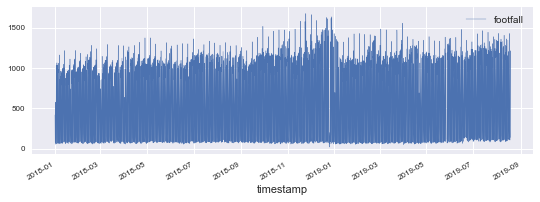

In [6]:
plt.style.use('seaborn')
ff = ff.reset_index(drop = True)
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()
ff_sum.plot(figsize =(8,3), fontsize = 8, linewidth = 0.4)

<AxesSubplot:ylabel='footfall'>

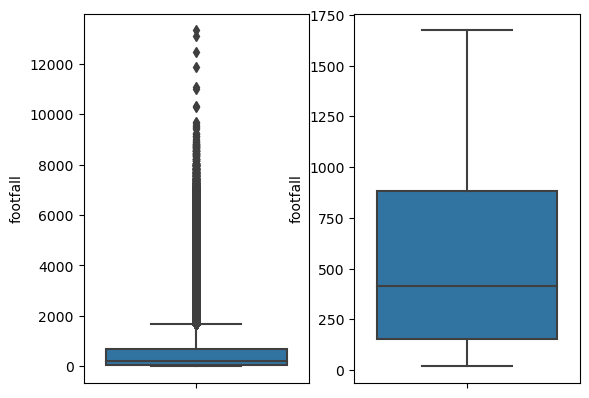

<Figure size 400x200 with 0 Axes>

In [38]:
fig,axs = plt.subplots(1,2)
plt.figure(figsize=(4,2))

sns.boxplot(y='footfall', data=ff, ax = axs[0])
sns.boxplot(y='footfall', data=hourly, ax = axs[1])

Text(0, 0.5, 'count')

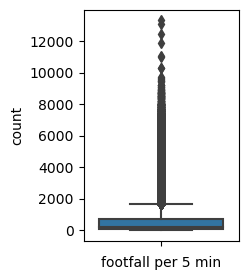

In [46]:
plt.figure(figsize=(2,3))
sns.boxplot(y='footfall', data=ff).set_xlabel('footfall per 5 min',fontsize = 10)
plt.gca().set_ylabel('count',fontsize = 10)

Text(0, 0.5, 'count')

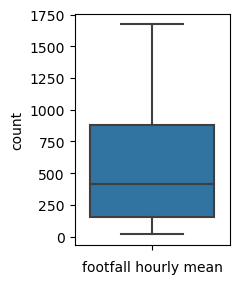

In [47]:
plt.figure(figsize=(2,3))
sns.boxplot(y='footfall', data=hourly).set_xlabel('footfall hourly mean',fontsize = 10)
plt.gca().set_ylabel('count',fontsize = 10)

Text(0, 0.5, 'Frequency')

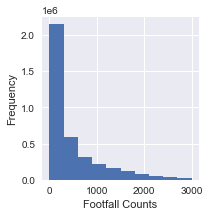

In [9]:
ff.loc[ff['footfall'] <= 3000]['footfall'].hist(figsize =(2.5,2.8))
plt.xlabel('Footfall Counts')
plt.ylabel('Frequency')

Text(0.5, 0, 'Footfall Counts Distribution')

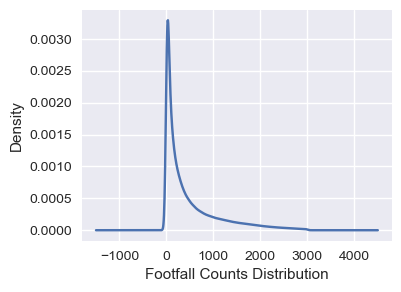

In [34]:
#ff.loc[ff['footfall'] <= 3000]['footfall'].plot(figsize =(4,3),kind ='kde')
#plt.xlabel('Footfall Counts Distribution')

[Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7')]

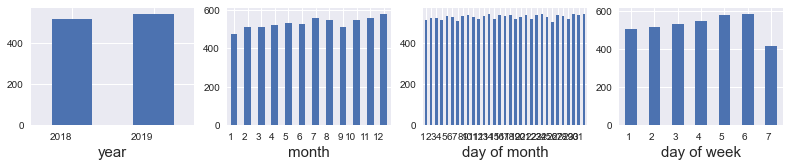

In [10]:
fig,axs = plt.subplots(1,4)

ff.groupby('year')['footfall'].mean().plot.bar(figsize = (12,2),ax = axs[0]).set_xlabel('year',fontsize = 15)
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=0, ha='right')

ff.groupby('month')['footfall'].mean().plot.bar(ax = axs[1],).set_xlabel('month',fontsize = 15)
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=0, ha='right')

ff.groupby('day')['footfall'].mean().plot.bar(ax = axs[2],).set_xlabel('day of month',fontsize = 15)
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=0, ha='right')

ff.groupby('day_of_week')['footfall'].mean().plot.bar(ax = axs[3],).set_xlabel('day of week', fontsize = 15)
axs[3].set_xticklabels(axs[3].get_xticklabels(), rotation=0, ha='right')


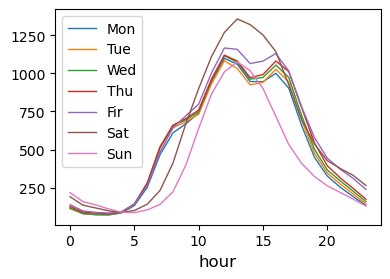

In [27]:
weekday = 1
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    figsize = (4.2,2.8), label = 'Mon',linewidth =1).set_xlabel('Hour',fontsize = 12)

weekday = 2
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Tue',linewidth =1)

weekday = 3
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Wed',linewidth =1)

weekday = 4
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Thu',linewidth =1)

weekday = 5
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Fir',linewidth =1)
weekday = 6
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Sat',linewidth =1)

weekday = 7
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Sun',linewidth =1)


plt.legend(loc = 'best')

In [12]:
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()

#Hourly
hourly = ff_sum.resample('H').mean()
#Daily
daily = ff_sum.resample('D').mean()
#Weekly
weekly = ff_sum.resample('W').mean()
#Monthly
monthly = ff_sum.resample('M').mean()

In [61]:
Train_hourly = hourly.loc[(hourly.index >= '2018-01-01 00:00') & (hourly.index <= '2019-07-28 23:00')]
Valid_hourly = hourly.loc[(hourly.index >= '2019-07-29 00:00') & (hourly.index <= '2019-08-18 23:00')]

Train_daily = daily.loc[(daily.index >= '2018-01-01 00:00') & (daily.index <= '2019-07-28 23:00')]
Valid_daily = daily.loc[(daily.index >= '2019-07-28 00:00') & (daily.index <= '2019-08-18 23:00')]

Train_weekly = weekly.loc[(weekly.index >= '2018-01-01 00:00') & (weekly.index <= '2019-07-28 23:00')]
Valid_weekly = weekly.loc[(weekly.index >= '2019-07-28 00:00') & (weekly.index <= '2019-08-18 23:00')]

Train_monthly = monthly.loc[(monthly.index >= '2018-01-01 00:00') & (monthly.index <= '2019-07-28 23:00')]
Valid_monthly = monthly.loc[(monthly.index >= '2019-07-1 00:00') & (monthly.index <= '2019-08-18 23:00')]


Text(0.5, 0, 'Timestamp')

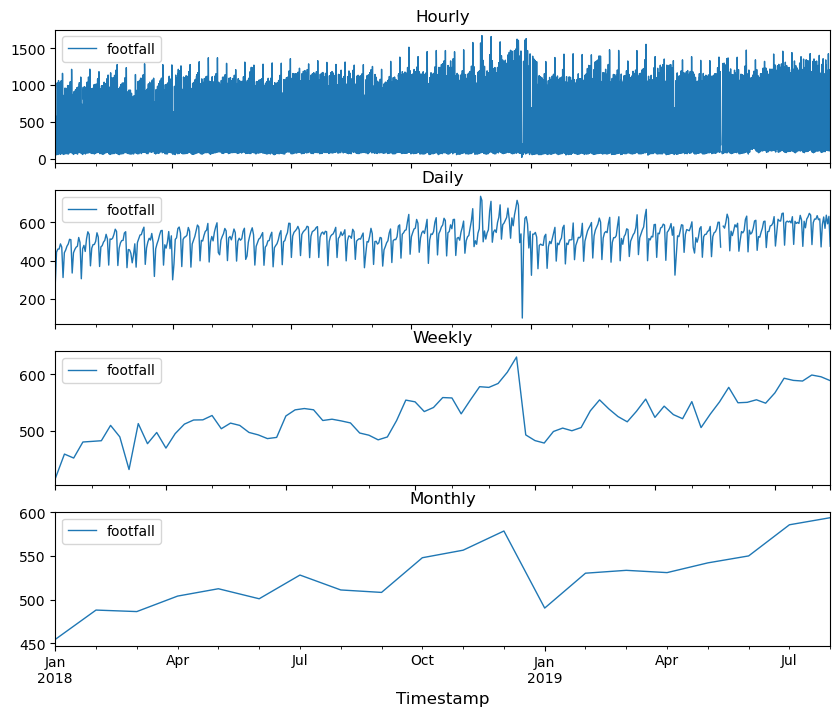

In [49]:
fig,axs = plt.subplots(4,1)


hourly.plot(figsize = (10,8), title = "Hourly", fontsize = 10, ax = axs[0], linewidth = 1).set_xticklabels([])
axs[0].set_xlabel('')

daily.plot(title = "Daily", fontsize = 10, ax = axs[1], linewidth = 1).set_xticklabels([])
axs[1].set_xlabel('')

weekly.plot(title = "Weekly", fontsize = 10, ax = axs[2], linewidth = 1).set_xticklabels([])
axs[2].set_xlabel('')

monthly.plot(title = "Monthly", fontsize = 10, ax = axs[3], linewidth = 1)

axs[3].set_xlabel('Timestamp', fontsize = 12)

Text(0.5, 0, 'Timestamp')

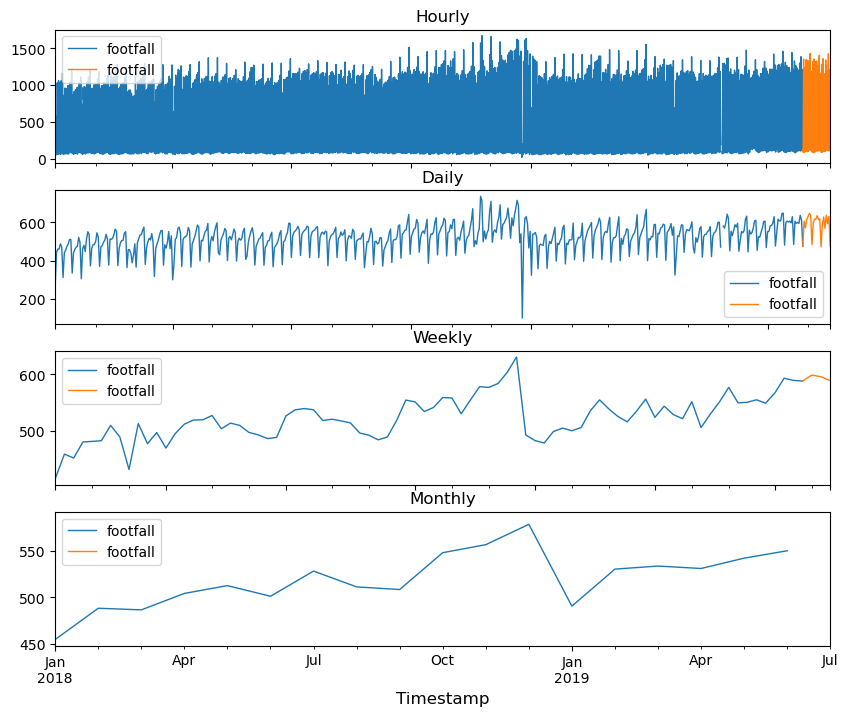

In [62]:
plt.style.use('default')
fig,axs = plt.subplots(4,1)

Train_hourly.plot(figsize = (10,8), title = "Hourly", fontsize = 10, ax = axs[0], linewidth = 1).set_xticklabels([])
axs[0].set_xlabel('')

Valid_hourly.plot(figsize = (10,8), title = "Hourly", fontsize = 10, ax = axs[0], linewidth = 1).set_xticklabels([])
axs[0].set_xlabel('')

Train_daily.plot(title = "Daily", fontsize = 10, ax = axs[1], linewidth = 1).set_xticklabels([])
axs[1].set_xlabel('')
Valid_daily.plot(title = "Daily", fontsize = 10, ax = axs[1], linewidth = 1).set_xticklabels([])
axs[1].set_xlabel('')

Train_weekly.plot(title = "Weekly", fontsize = 10, ax = axs[2], linewidth = 1).set_xticklabels([])
axs[2].set_xlabel('')
Valid_weekly.plot(title = "Weekly", fontsize = 10, ax = axs[2], linewidth = 1).set_xticklabels([])
axs[2].set_xlabel('')

Train_monthly.plot(title = "Monthly", fontsize = 10, ax = axs[3], linewidth = 1)
Valid_monthly.plot(title = "Monthly", fontsize = 10, ax = axs[3], linewidth = 1)

axs[3].set_xlabel('Timestamp', fontsize = 12)

<AxesSubplot:xlabel='timestamp'>

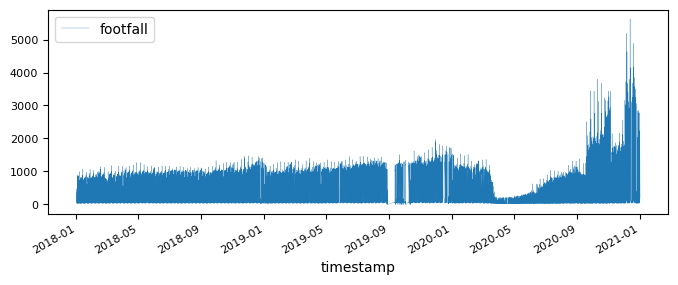

In [25]:
#ff = ff.loc[(ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-12-31')]
#plt.style.use('seaborn')
ff = ff.loc[(ff.timestamp >= '2018-01')]
ff = ff.reset_index(drop = True)
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()
ff_sum.plot(figsize =(8,3), fontsize = 8, linewidth = 0.2)


In [75]:
import seaborn as sns
import os
import statistics

In [7]:
ff_sum = ff.groupby('timestamp')['footfall'].mean().to_frame()

#Hourly
hourly = ff_sum.resample('H').mean()

#Daily
daily = ff_sum.resample('D').mean()

#Weekly
weekly = ff_sum.resample('W').mean()

#Monthly
monthly = ff_sum.resample('M').mean()

<AxesSubplot:xlabel='day_of_week'>

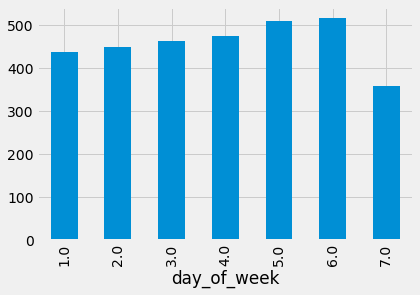

In [8]:
ff.groupby('day_of_week')['footfall'].mean().plot.bar()

<AxesSubplot:xlabel='hour'>

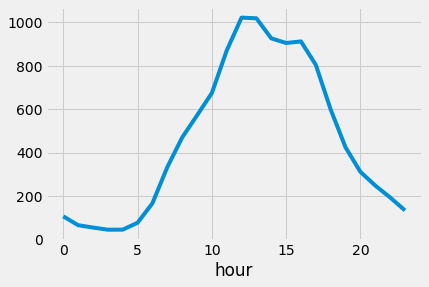

In [9]:
ff.groupby('hour')['footfall'].mean().plot.line()

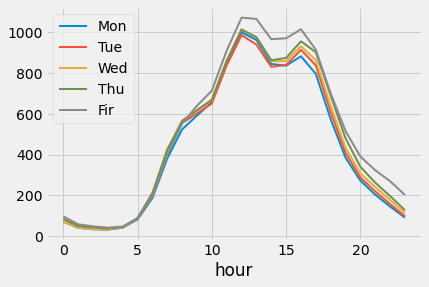

In [10]:
weekday = 1
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Mon', linewidth = 2)

weekday = 2
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Tue', linewidth = 2)

weekday = 3
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Wed', linewidth = 2)

weekday = 4
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Thu', linewidth = 2)

weekday = 5
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Fir', linewidth = 2)

plt.legend(loc = 'best')

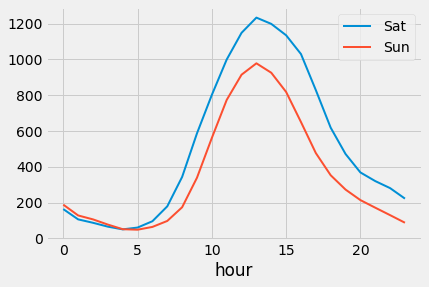

In [11]:
weekday = 6
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Sat', linewidth = 2)

weekday = 7
ff.loc[(ff.day_of_week >= weekday) & (ff.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Sun', linewidth = 2)

plt.legend(loc = 'best')

# Time Series Forecasting
## Case Study -- Location 639 (163 High Street):

In [51]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import TimeSeriesSplit

from dateutil.relativedelta import relativedelta # working with dates with style
from scipy.optimize import minimize              # for function minimization

import statsmodels.formula.api as smf            # statistics and econometrics
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # some useful functions

In [55]:
plt.style.use('default')

### Load the Interpolated Data:

In [32]:
ff = pd.read_csv('stackfootfall.csv')
ff.timestamp = pd.to_datetime(ff.timestamp, format = '%Y-%m-%d %H:%M:%S') 

In [53]:
loc = 639
ff639 = ff.loc[(ff.location <= loc) & (ff.location >= loc) & 
               (ff.timestamp >= '2018-01') & (ff.timestamp <= '2019-08-19')][[
    'timestamp','footfall','year','month','day','hour','day_of_week']]
ff639.index = ff639.timestamp
ff639.head()

,timestamp,footfall,year,month,day,hour,day_of_week
timestamp,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,129.0,2018,1,1,0,1
2018-01-01 01:00:00,2018-01-01 01:00:00,127.0,2018,1,1,1,1
2018-01-01 02:00:00,2018-01-01 02:00:00,121.0,2018,1,1,2,1
2018-01-01 03:00:00,2018-01-01 03:00:00,110.0,2018,1,1,3,1
2018-01-01 04:00:00,2018-01-01 04:00:00,83.0,2018,1,1,4,1


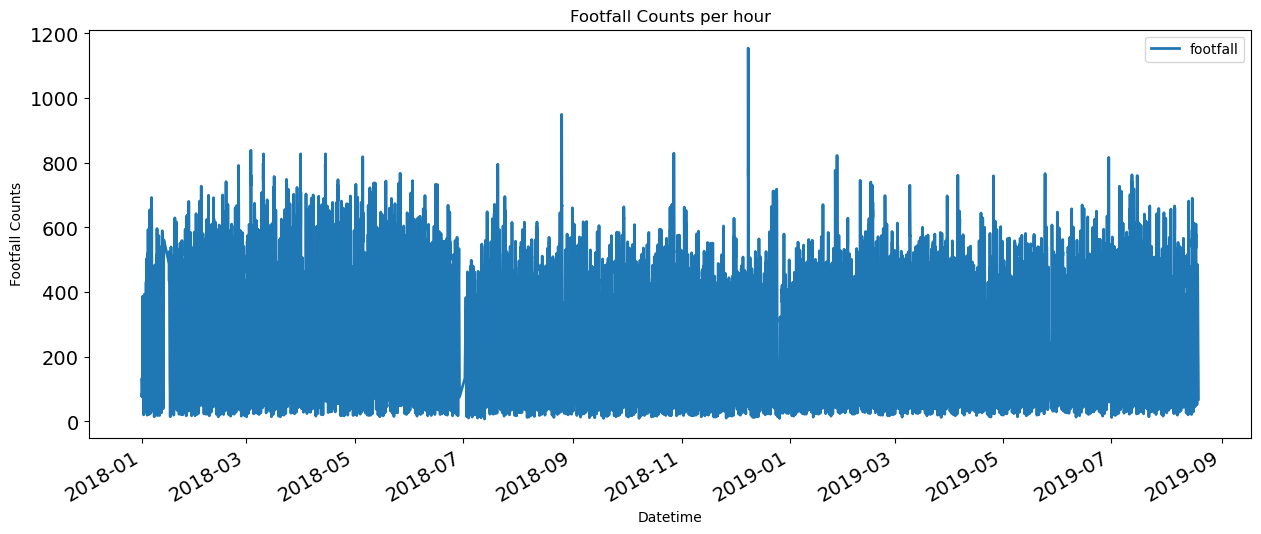

In [56]:

ff639['footfall'].plot(figsize = (15,6), title = 'Footfall Counts per hour', fontsize = 14, linewidth = 2)
plt.xlabel('Datetime')
plt.ylabel('Footfall Counts')
plt.legend(loc = 'best')

In [35]:
ff639 = ff639.resample('H').mean()
ff639['footfall'].replace(0, np.nan, inplace = True)
ff639['footfall'] = ff639['footfall'].interpolate(method='linear')
ff639 = ff639.reset_index(level = ['timestamp'])
ff639.timestamp = pd.to_datetime(ff639.timestamp, format = '%Y-%m-%d %H:%M:%S')
ff639

,timestamp,footfall,year,month,day,hour,day_of_week
0,2018-01-01 00:00:00,144.0,2018.0,1.0,1.0,0.0,1.0
1,2018-01-01 01:00:00,91.0,2018.0,1.0,1.0,1.0,1.0
2,2018-01-01 02:00:00,59.0,2018.0,1.0,1.0,2.0,1.0
3,2018-01-01 03:00:00,69.0,2018.0,1.0,1.0,3.0,1.0
4,2018-01-01 04:00:00,62.0,2018.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...
14276,2019-08-18 20:00:00,341.0,2019.0,8.0,18.0,20.0,7.0
14277,2019-08-18 21:00:00,211.0,2019.0,8.0,18.0,21.0,7.0
14278,2019-08-18 22:00:00,264.0,2019.0,8.0,18.0,22.0,7.0
14279,2019-08-18 23:00:00,240.0,2019.0,8.0,18.0,23.0,7.0


In [36]:
temp = ff639[['timestamp', 'footfall']]
temp.index = temp.timestamp
temp['year'] = temp.timestamp.dt.year
temp['month'] = temp.timestamp.dt.month
temp['day'] = temp.timestamp.dt.day
temp['hour'] = temp.timestamp.dt.hour
temp['day_of_week'] = temp.timestamp.dt.dayofweek + 1
temp

,timestamp,footfall,year,month,day,hour,day_of_week
timestamp,,,,,,,
2018-01-01 00:00:00,2018-01-01 00:00:00,144.0,2018,1,1,0,1
2018-01-01 01:00:00,2018-01-01 01:00:00,91.0,2018,1,1,1,1
2018-01-01 02:00:00,2018-01-01 02:00:00,59.0,2018,1,1,2,1
2018-01-01 03:00:00,2018-01-01 03:00:00,69.0,2018,1,1,3,1
2018-01-01 04:00:00,2018-01-01 04:00:00,62.0,2018,1,1,4,1
...,...,...,...,...,...,...,...
2019-08-18 20:00:00,2019-08-18 20:00:00,341.0,2019,8,18,20,7
2019-08-18 21:00:00,2019-08-18 21:00:00,211.0,2019,8,18,21,7
2019-08-18 22:00:00,2019-08-18 22:00:00,264.0,2019,8,18,22,7


In [37]:
ff639 = temp

### Hourly Distribution by Day of Week

#### Overall Distribution:

<AxesSubplot:xlabel='hour'>

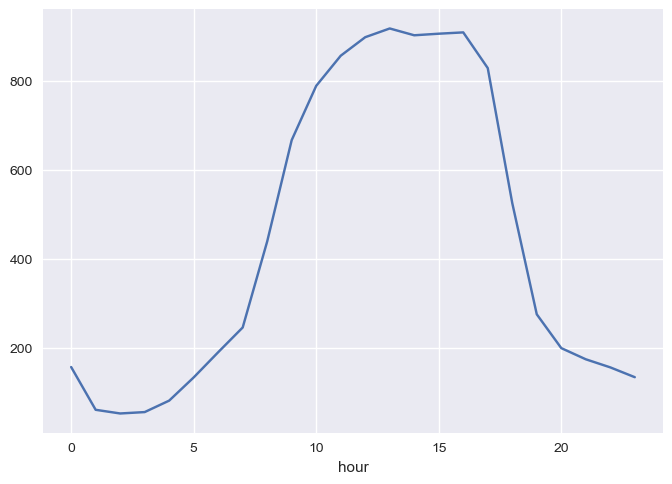

In [38]:
ff639.groupby('hour')['footfall'].mean().plot.line()

#### Monday to Friday Distribution:

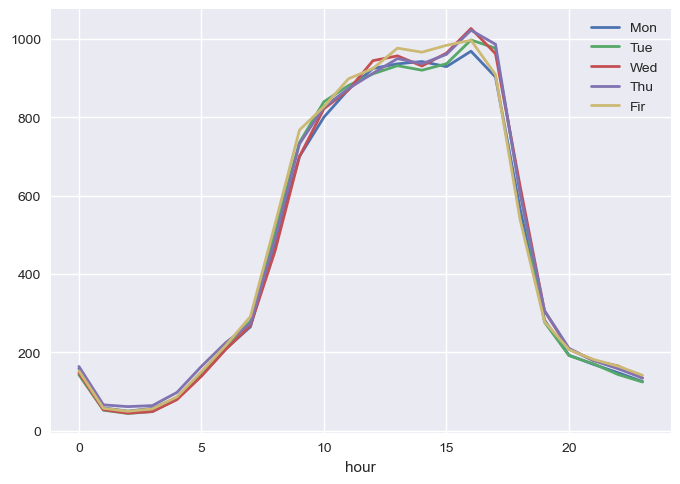

In [39]:
weekday = 1
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Mon', linewidth = 2)

weekday = 2
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Tue', linewidth = 2)

weekday = 3
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Wed', linewidth = 2)

weekday = 4
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Thu', linewidth = 2)

weekday = 5
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Fir', linewidth = 2)

plt.legend(loc = 'best')

#### Saturday & Sunday Distribution:

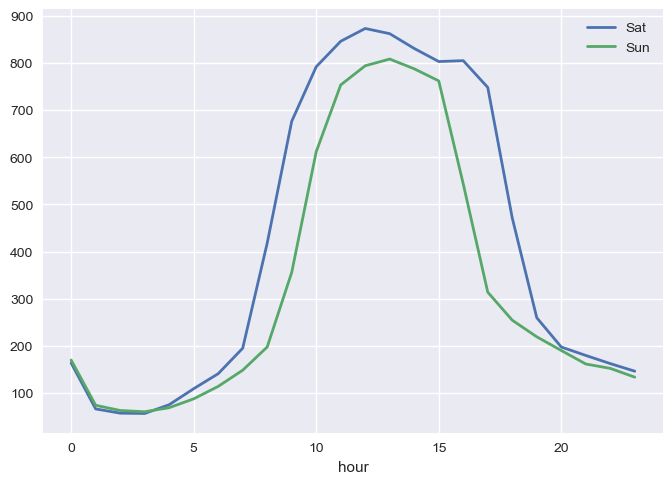

In [40]:
weekday = 6
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Sat', linewidth = 2)

weekday = 7
ff639.loc[(ff639.day_of_week >= weekday) & (ff639.day_of_week <= weekday)].groupby('hour')['footfall'].mean().plot(
    label = 'Sun', linewidth = 2)

plt.legend(loc = 'best')

### Divide Data into Training and Validation

In [57]:
Train = ff639.loc[(ff639.timestamp >= '2018-01-01 00:00') & (ff639.timestamp <= '2019-07-28 23:00')]
Valid = ff639.loc[(ff639.timestamp >= '2019-07-29 00:00') & (ff639.timestamp <= '2019-08-18 23:00')]

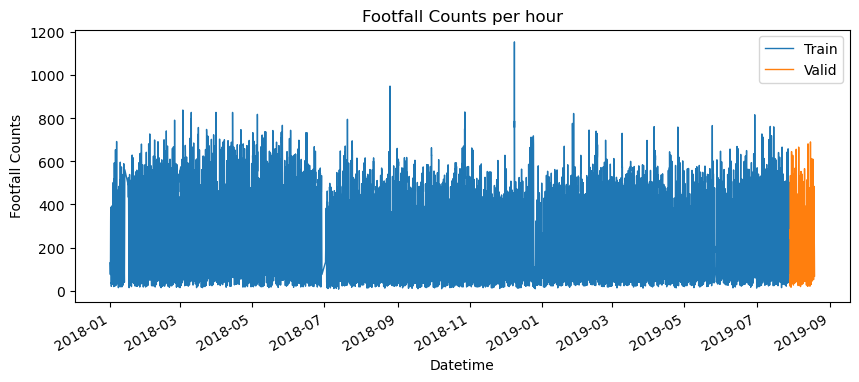

In [60]:
Train['footfall'].plot(figsize = (10,4), title = 'Footfall Counts per hour',  label = 'Train', linewidth = 1)
Valid['footfall'].plot(label = 'Valid', linewidth = 1)
plt.xlabel('Datetime')
plt.ylabel('Footfall Counts')
plt.legend(loc = 'best')

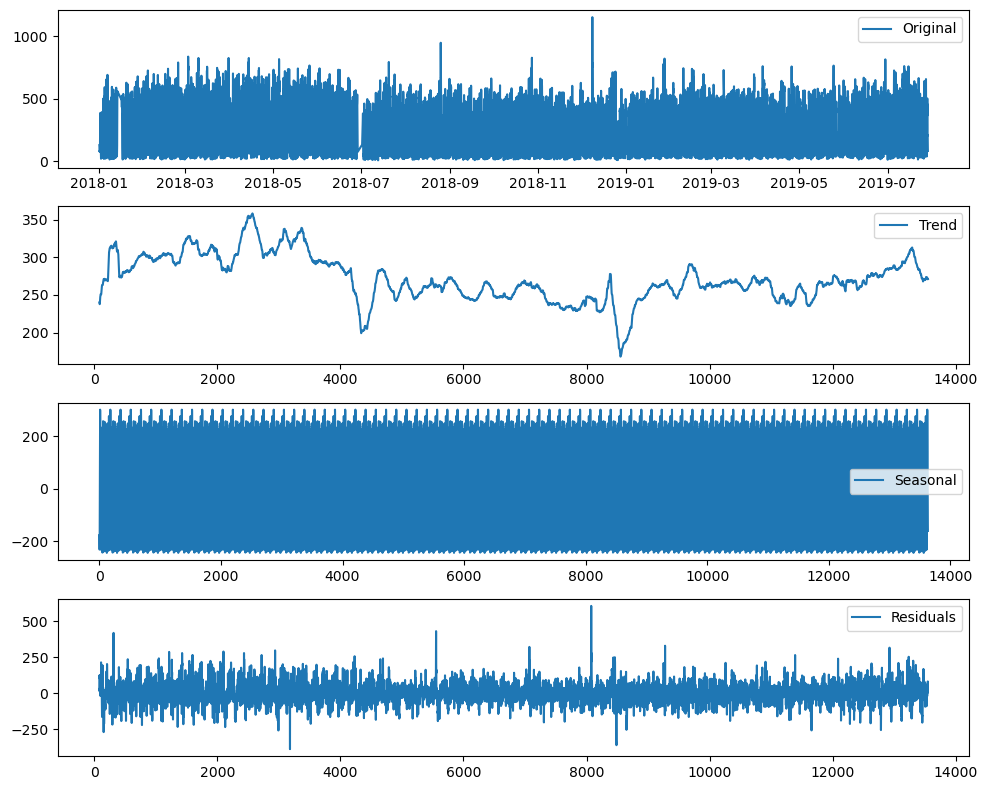

In [93]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (10,8))
decomposition = seasonal_decompose(pd.DataFrame(Train).footfall.values, freq = 168) # 1 week
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Train.footfall, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

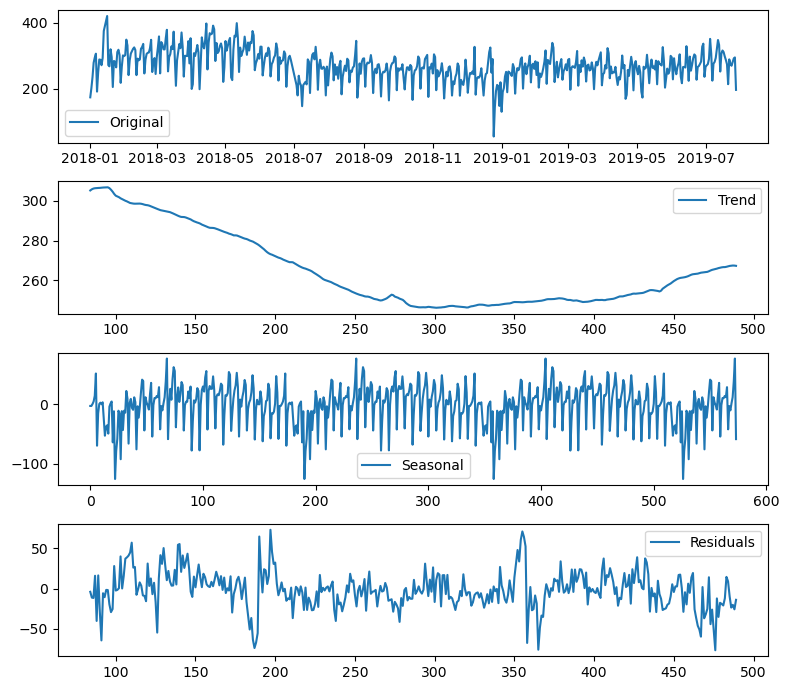

In [96]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize = (8,7))
decomposition = seasonal_decompose(pd.DataFrame(train).footfall.values, freq = 168) # 1 week
plt.style.use('default')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(train.footfall, label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonal')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')
plt.tight_layout()

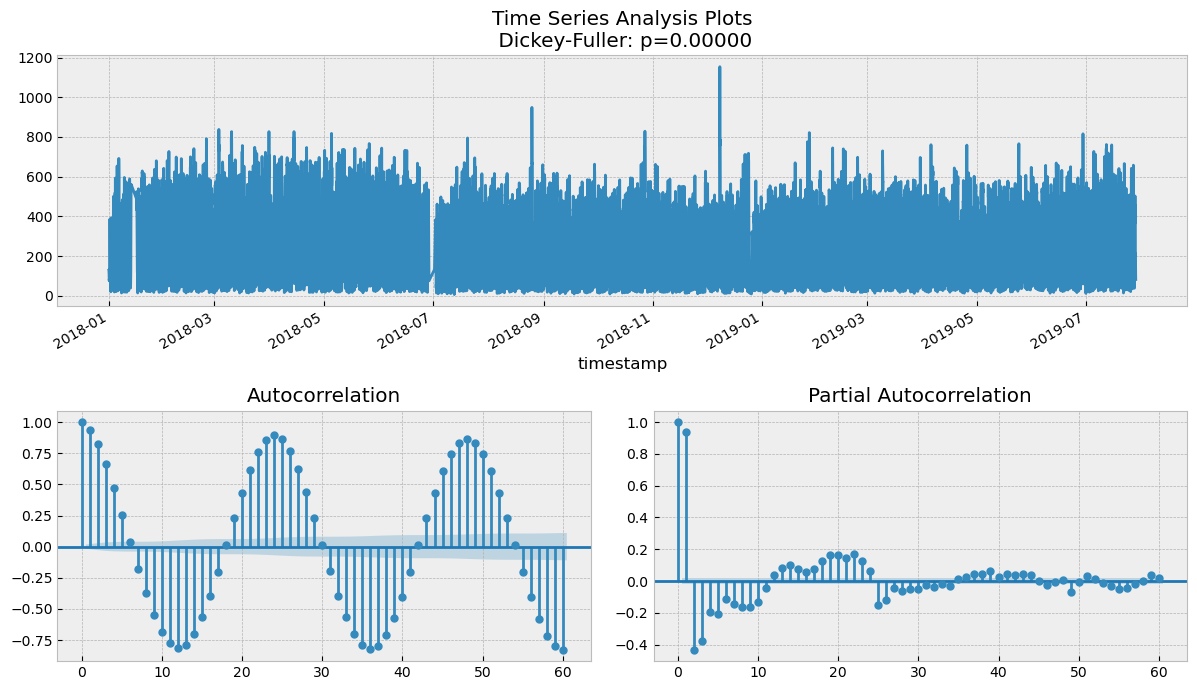

In [72]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()
        
tsplot(Train['footfall'], lags=60)

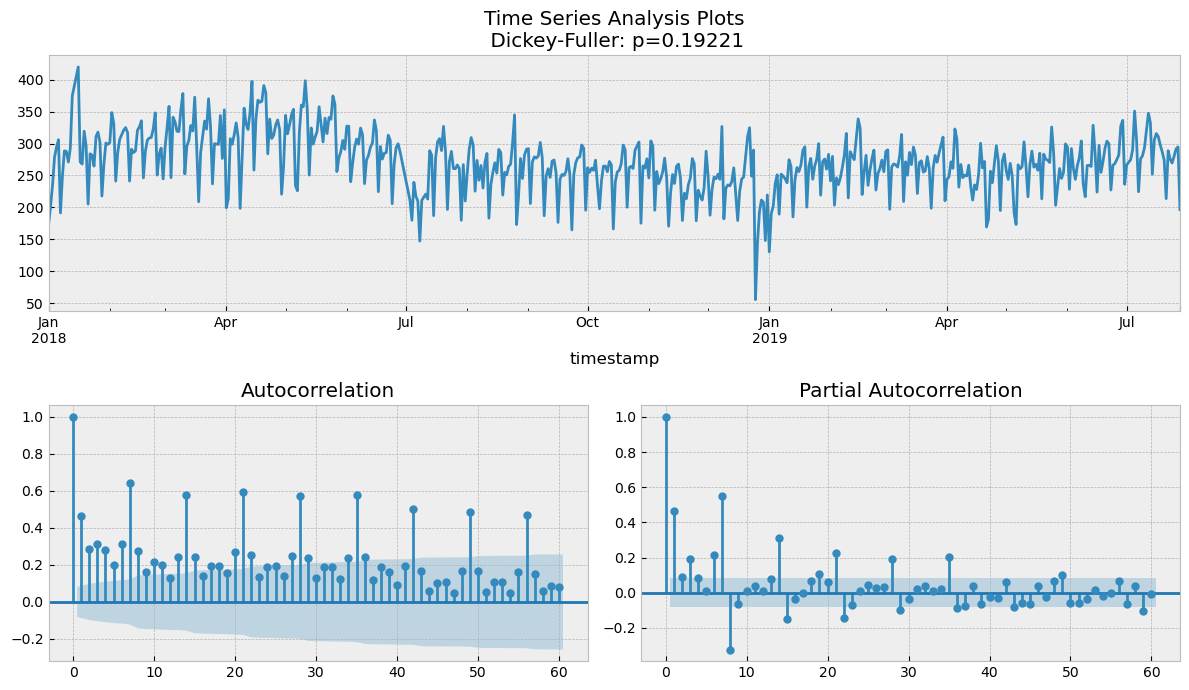

In [95]:
tsplot(train['footfall'], lags=60)

### Convert to Daily Mean and Calc Hourly Ratio by Day of Week

In [73]:
train = Train.resample('D').mean()
valid = Valid.resample('D').mean() 

In [74]:
train['footfall'] = train['footfall'].interpolate(method='linear')
valid['footfall'] = valid['footfall'].interpolate(method='linear')

In [75]:
# Monday to Friday Ratio
mtf = Train.loc[(Train.day_of_week >= 1) & (Train.day_of_week <= 5)].groupby('hour')['footfall'].mean().to_frame()
mtf['ratio'] = mtf['footfall']/mtf['footfall'].sum()
mtf = mtf.reset_index(level = ['hour'])

# Weekend Ratio
weekend = Train.loc[(Train.day_of_week >= 6) & (Train.day_of_week <= 7)].groupby('hour')['footfall'].mean().to_frame()
weekend['ratio'] = weekend['footfall']/weekend['footfall'].sum()
weekend = weekend.reset_index(level = ['hour'])

ratio1 = mtf[['hour','ratio']]
ratio1['day_of_week'] = 1
ratio2 = mtf[['hour','ratio']]
ratio2['day_of_week'] = 2
ratio3 = mtf[['hour','ratio']]
ratio3['day_of_week'] = 3
ratio4 = mtf[['hour','ratio']]
ratio4['day_of_week'] = 4
ratio5 = mtf[['hour','ratio']]
ratio5['day_of_week'] = 5
ratio6 = weekend[['hour','ratio']]
ratio6['day_of_week'] = 6
ratio7 = weekend[['hour','ratio']]
ratio7['day_of_week'] = 7

ratio_week = ratio1.append(ratio2).append(ratio3).append(ratio4).append(ratio5).append(ratio6).append(ratio7)

merge = pd.merge(Valid, ratio_week, on = ('hour','day_of_week'), how = 'left')
merge

,timestamp,footfall,year,month,day,hour,day_of_week,ratio
0,2019-07-29 00:00:00,50.0,2019,7,29,0,1,0.010652
1,2019-07-29 01:00:00,39.0,2019,7,29,1,1,0.005311
2,2019-07-29 02:00:00,22.0,2019,7,29,2,1,0.004076
3,2019-07-29 03:00:00,23.0,2019,7,29,3,1,0.004783
4,2019-07-29 04:00:00,69.0,2019,7,29,4,1,0.009293
...,...,...,...,...,...,...,...,...
499,2019-08-18 19:00:00,206.0,2019,8,18,19,7,0.037976
500,2019-08-18 20:00:00,175.0,2019,8,18,20,7,0.031368
501,2019-08-18 21:00:00,113.0,2019,8,18,21,7,0.025794
502,2019-08-18 22:00:00,98.0,2019,8,18,22,7,0.021949


In [76]:
# Monday to Thursday Ratio
mtt = Train.loc[(Train.day_of_week >= 1) & (Train.day_of_week <= 4)].groupby('hour')['footfall'].mean().to_frame()
mtt['ratio'] = mtt['footfall']/mtt['footfall'].sum()
mtt = mtt.reset_index(level = ['hour'])

# Friday Ratio
fri = Train.loc[(Train.day_of_week >= 5) & (Train.day_of_week <= 5)].groupby('hour')['footfall'].mean().to_frame()
fri['ratio'] = fri['footfall']/fri['footfall'].sum()
fri = fri.reset_index(level = ['hour'])

# Sat Ratio
sat = Train.loc[(Train.day_of_week >= 6) & (Train.day_of_week <= 6)].groupby('hour')['footfall'].mean().to_frame()
sat['ratio'] = sat['footfall']/sat['footfall'].sum()
sat = sat.reset_index(level = ['hour'])

# Sun Ratio
sun = Train.loc[(Train.day_of_week >= 7) & (Train.day_of_week <= 7)].groupby('hour')['footfall'].mean().to_frame()
sun['ratio'] = sun['footfall']/sun['footfall'].sum()
sun = sun.reset_index(level = ['hour'])

ratio1 = mtt[['hour','ratio']]
ratio1['day_of_week'] = 1
ratio2 = mtt[['hour','ratio']]
ratio2['day_of_week'] = 2
ratio3 = mtt[['hour','ratio']]
ratio3['day_of_week'] = 3
ratio4 = mtt[['hour','ratio']]
ratio4['day_of_week'] = 4
ratio5 = fri[['hour','ratio']]
ratio5['day_of_week'] = 5
ratio6 = sat[['hour','ratio']]
ratio6['day_of_week'] = 6
ratio7 = sun[['hour','ratio']]
ratio7['day_of_week'] = 7

ratio_week = ratio1.append(ratio2).append(ratio3).append(ratio4).append(ratio5).append(ratio6).append(ratio7)

merge2 = pd.merge(Valid, ratio_week, on = ('hour','day_of_week'), how = 'left')
merge2

,timestamp,footfall,year,month,day,hour,day_of_week,ratio
0,2019-07-29 00:00:00,50.0,2019,7,29,0,1,0.010652
1,2019-07-29 01:00:00,39.0,2019,7,29,1,1,0.005344
2,2019-07-29 02:00:00,22.0,2019,7,29,2,1,0.004184
3,2019-07-29 03:00:00,23.0,2019,7,29,3,1,0.004967
4,2019-07-29 04:00:00,69.0,2019,7,29,4,1,0.009508
...,...,...,...,...,...,...,...,...
499,2019-08-18 19:00:00,206.0,2019,8,18,19,7,0.037967
500,2019-08-18 20:00:00,175.0,2019,8,18,20,7,0.031992
501,2019-08-18 21:00:00,113.0,2019,8,18,21,7,0.026881
502,2019-08-18 22:00:00,98.0,2019,8,18,22,7,0.021467


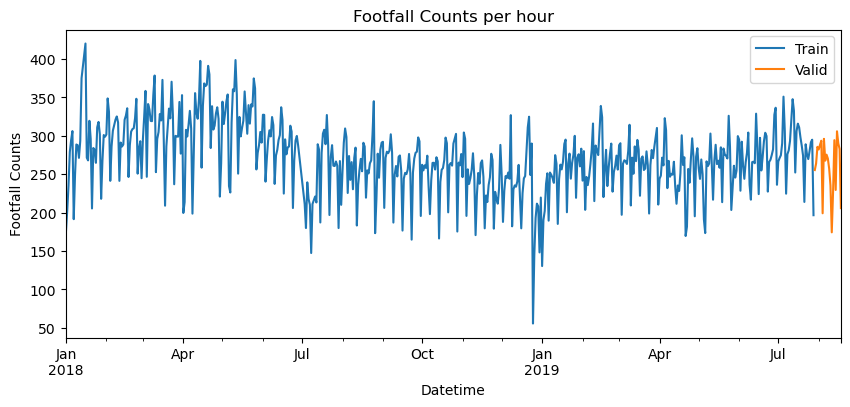

In [77]:
train['footfall'].plot(figsize = (10,4), title = 'Footfall Counts per hour',label = 'Train')
valid['footfall'].plot(label = 'Valid')
plt.xlabel('Datetime')
plt.ylabel('Footfall Counts')
plt.legend(loc = 'best')

In [78]:
from math import sqrt

def rmse(y_true, y_pred):
    squared_error = 0
    for i in range(len(y_true)):
        squared_error = squared_error + (y_true[i] - y_pred[i]) ** 2
    root_mean_squared_error = sqrt(squared_error / len(y_true))
    return root_mean_squared_error

### 1. Naive Approach

RMSE for Naive approach is 34.58893266011742


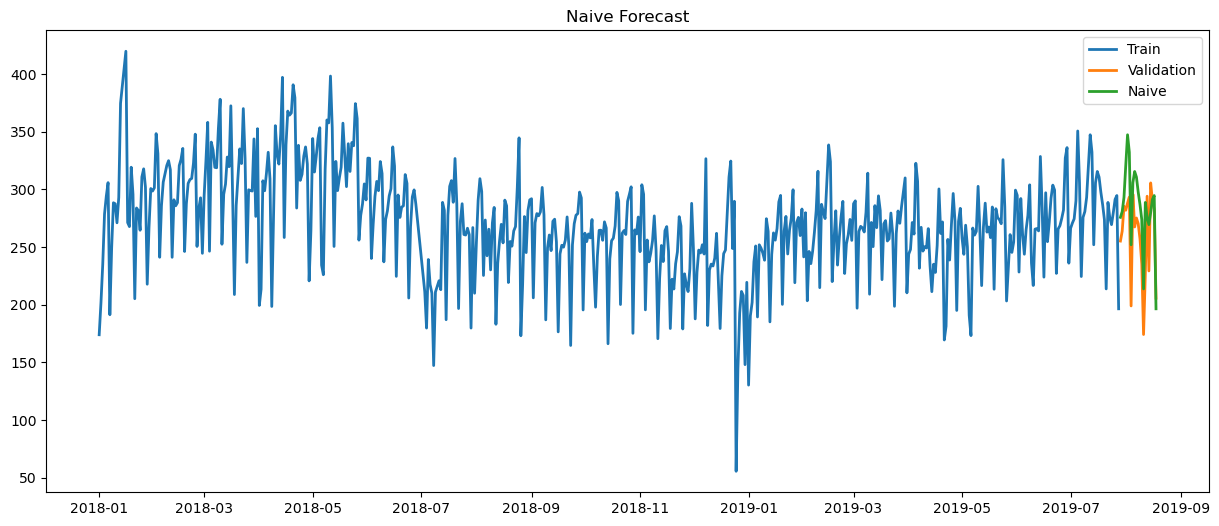

In [79]:
dd = np.asarray(train['footfall'])
y_hat = valid.copy()
y_hat['naive']= dd[len(dd)- 1]
for i in range(len(valid)): 
    y_hat['naive'][i]= dd[len(dd) - len(valid) + i]
    
plt.figure(figsize = (15,6))
plt.plot(train.index, train['footfall'], label = 'Train', linewidth = 2)
plt.plot(valid.index, valid['footfall'], label = 'Validation', linewidth = 2)
plt.plot(y_hat.index, y_hat['naive'], label = 'Naive', linewidth = 2)
plt.legend(loc = 'best')
plt.title('Naive Forecast')

naive_rmse = rmse(valid.footfall, y_hat.naive)
print('RMSE for Naive approach is',naive_rmse)

### 2. Moving Average Approach
#### Consider Seasonality (Weekly Fluctuations)

In [80]:
def moving_avg(rounds):
    y_hat['avg'] = 0
    for i in range(len(valid)):
        y_pred = 0
        for j in range(rounds):
            y_pred = y_pred + train.footfall[len(train) - (j + 1) * len(valid) + i]
        y_hat['avg'][i] = y_pred / rounds
    
    plt.figure(figsize = (15,5))
    plt.plot(train.footfall, label = 'Train', linewidth = 2)
    plt.plot(valid.footfall, label = 'Validation', linewidth = 2)
    plt.plot(y_hat['avg'], label = 'Monving Average Forecast with ' + str(3 * rounds) + ' Weeks Observations', linewidth = 2)
    plt.legend(loc = 'best')
    plt.show()
    
    avg_rmse = rmse(valid.footfall, y_hat.avg)
    print('RMSE equals', avg_rmse)

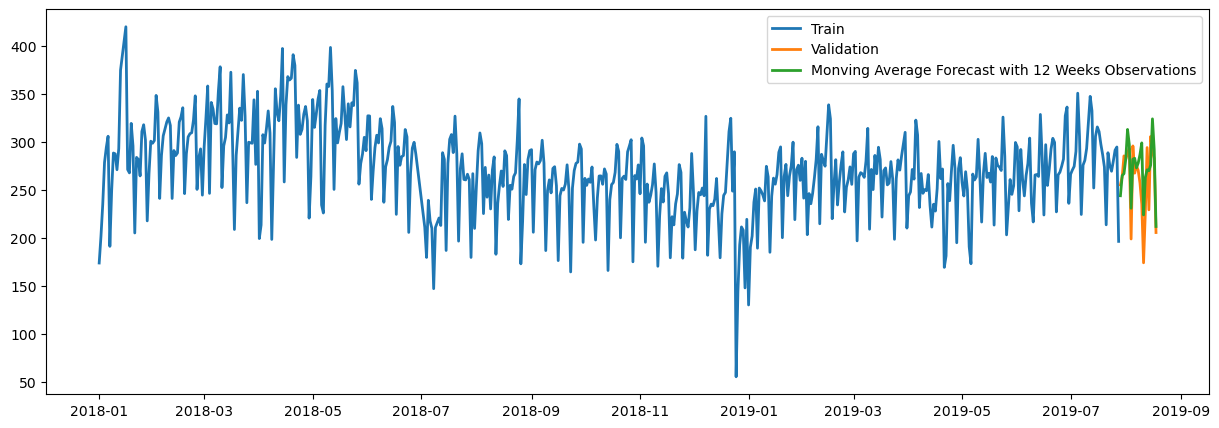

RMSE equals 27.335843622629366


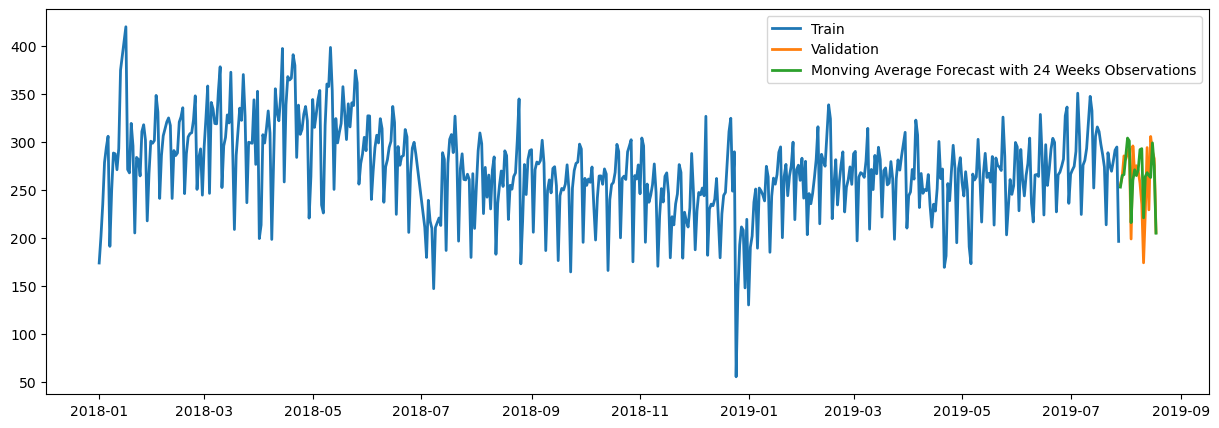

RMSE equals 26.19232767625911


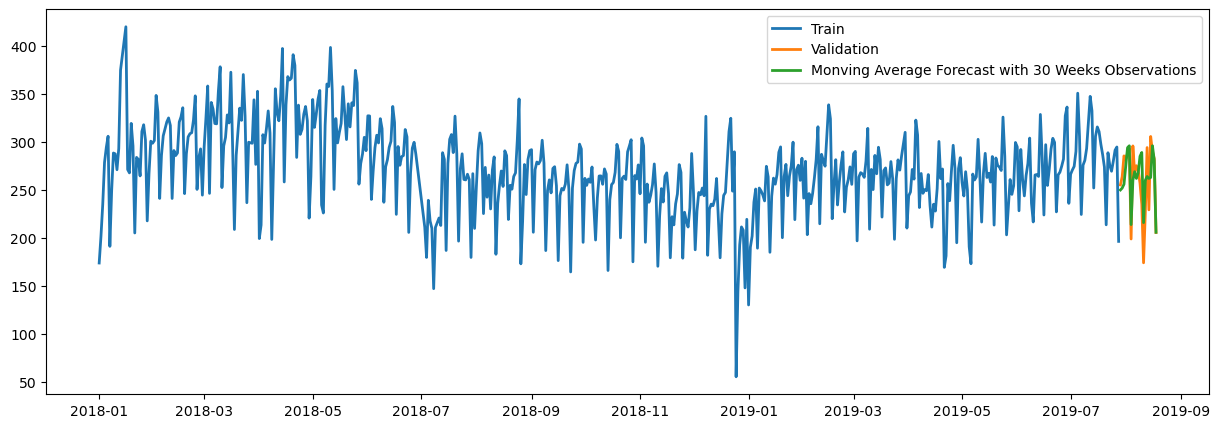

RMSE equals 25.016390129918324


In [81]:
moving_avg(4)
avg_rmse4 = rmse(valid.footfall, y_hat.avg)
moving_avg(8)
avg_rmse8 = rmse(valid.footfall, y_hat.avg)
moving_avg(10)
avg_rmse10 = rmse(valid.footfall, y_hat.avg)

### 3. Exponential Smoothing
#### Holt-Winters’ Seasonal Method

RMSE for Holt Winters seasonal forecast is  28.850258092075546


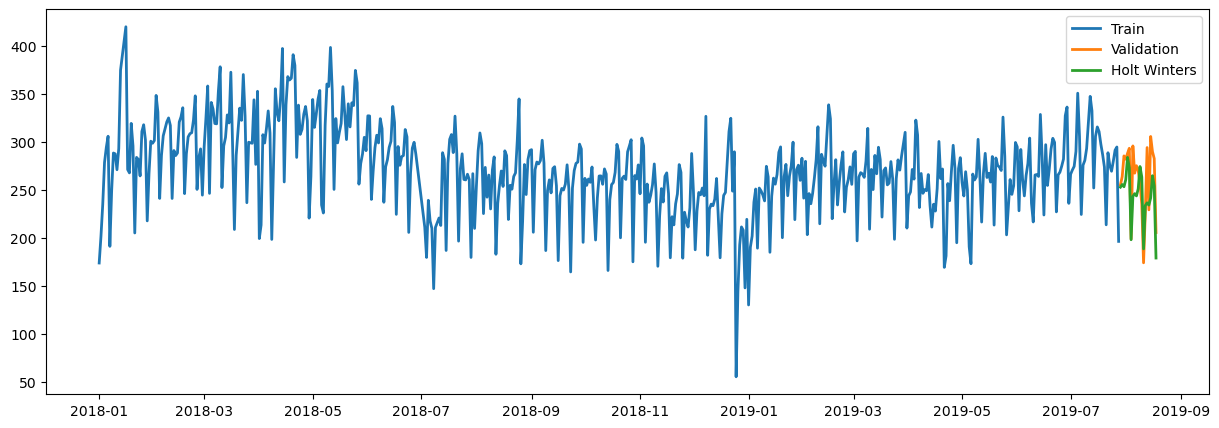

In [82]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing, Holt

y_hat = valid.copy()
fit1 = ExponentialSmoothing(np.asarray(train.footfall), seasonal_periods = 7, trend = 'add', seasonal= 'add').fit()
y_hat['Holt_Winter'] = fit1.forecast(len(valid))

plt.figure(figsize = (15,5))
plt.plot(train.footfall, label = 'Train', linewidth = 2)
plt.plot(valid.footfall, label = 'Validation', linewidth = 2)
plt.plot(y_hat.Holt_Winter, label = 'Holt Winters', linewidth = 2)
plt.legend(loc = 'best')

rmse_hw = rmse(valid.footfall, y_hat.Holt_Winter)
print('RMSE for Holt Winters seasonal forecast is ', rmse_hw)

#### Covert to Hourly Predictions:

In [83]:
pred_d = y_hat.Holt_Winter.to_frame()
pred_d = pred_d.reset_index(level = ['timestamp'])
pred_d['month'] = pred_d.timestamp.dt.month
pred_d['day'] = pred_d.timestamp.dt.day

temp = pd.merge(merge, pred_d, on = ('month','day'), how = 'left')
temp['prediction'] = temp['ratio'] * temp['Holt_Winter'] * 24

holt_winter_rmse = rmse(temp['footfall'], temp['prediction'])
print('RMSE for Holt Winters seasonal forecast is ', holt_winter_rmse)

RMSE for Holt Winters seasonal forecast is  57.13903696413851


In [84]:
temp2 = pd.merge(merge2, pred_d, on = ('month','day'), how = 'left')
temp2['prediction'] = temp2['ratio'] * temp2['Holt_Winter'] * 24

holt_winter_rmse2 = rmse(temp2['footfall'], temp2['prediction'])
print('RMSE for Holt Winters seasonal forecast is ', holt_winter_rmse2)

RMSE for Holt Winters seasonal forecast is  56.63820899362523


### 4. ARIMA Model

In [85]:
from statsmodels.tsa.stattools import adfuller
from matplotlib.pylab import rcParams

### SARIMA Model

#### Auto ARIMA Model

In [86]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from pmdarima.arima import auto_arima

In [87]:
arima_model = auto_arima(train.footfall, X = None, start_p = 0, d = 1, 
                         start_q = 0, max_p = 5, max_d=2, max_q=5, start_P = 0, 
                         D = 1, start_Q = 0, max_P = 5, max_D = 5, max_Q = 5, 
                         m = 7, seasonal = True, stepwise = True, n_jobs = 1, 
                         error_action = 'warn', trace = True, random = False, 
                         random_state = 20, n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[7]             : AIC=5756.841, Time=0.35 sec
 ARIMA(1,1,0)(1,1,0)[7]             : AIC=5560.813, Time=0.15 sec
 ARIMA(0,1,1)(0,1,1)[7]             : AIC=inf, Time=0.50 sec
 ARIMA(1,1,0)(0,1,0)[7]             : AIC=5695.122, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[7]             : AIC=5487.247, Time=0.29 sec
 ARIMA(1,1,0)(3,1,0)[7]             : AIC=5451.747, Time=0.52 sec
 ARIMA(1,1,0)(4,1,0)[7]             : AIC=5413.770, Time=0.91 sec
 ARIMA(1,1,0)(5,1,0)[7]             : AIC=5408.733, Time=1.17 sec
 ARIMA(1,1,0)(5,1,1)[7]             : AIC=inf, Time=8.63 sec
 ARIMA(1,1,0)(4,1,1)[7]             : AIC=inf, Time=4.91 sec
 ARIMA(0,1,0)(5,1,0)[7]             : AIC=5470.685, Time=2.27 sec
 ARIMA(2,1,0)(5,1,0)[7]             : AIC=5394.107, Time=1.53 sec
 ARIMA(2,1,0)(4,1,0)[7]             : AIC=5399.268, Time=1.03 sec
 ARIMA(2,1,0)(5,1,1)[7]             : AIC=inf, Time=12.78 sec
 ARIMA(2,1,0)(4,1,1)[7]             : AIC=inf, Time=

In [88]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                                 y   No. Observations:                  574
Model:             SARIMAX(5, 1, 0)x(5, 1, 0, 7)   Log Likelihood               -2673.696
Date:                           Mon, 23 Aug 2021   AIC                           5369.393
Time:                                   09:33:20   BIC                           5417.117
Sample:                                        0   HQIC                          5388.019
                                           - 574                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4446      0.038    -11.752      0.000      -0.519      -0.370
ar.L2         -0.2790      0.049     -5.688      0.000      -0.375      -0.183
ar.L3         -0.2258      0.033     -6.925      0.000      -0.290      -0.162
ar.L4         -0.2101      0.039     -5.325      0.000      -0.288      -0.133
ar.L5         -0.1354      0.050     -2.734      0.006      -0.232      -0.038
ar.S.L7       -0.8678      0.040    -21.481      0.000      -0.947      -0.789
ar.S.L14      -0.7716      0.046    -16.712      0.000      -0.862      -0.681
ar.S.L21      -0.5704      0.048    -11.902      0.000      -0.664      -0.476
ar.S.L28      -0.3815      0.049     -7.764      0.000      -0.478      -0.285
ar.S.L35      -0.1138      0.043     -2.662      0.008      -0.198      -0.030
sigma2       731.0975     20.762     35.213      0.000     690.404     771.791
===================================================================================
Ljung-Box (L1) (Q):                   0.10   Jarque-Bera (JB):              2638.44
Prob(Q):                              0.75   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                            -1.14
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
y_hat['SARIMA'] = arima_model.predict(n_periods = len(valid))
rmse_sarima = rmse(valid['footfall'], y_hat['SARIMA'])
print('RMSE for SARIMA forecast is ', rmse_sarima)

RMSE for SARIMA forecast is  24.338522599987805


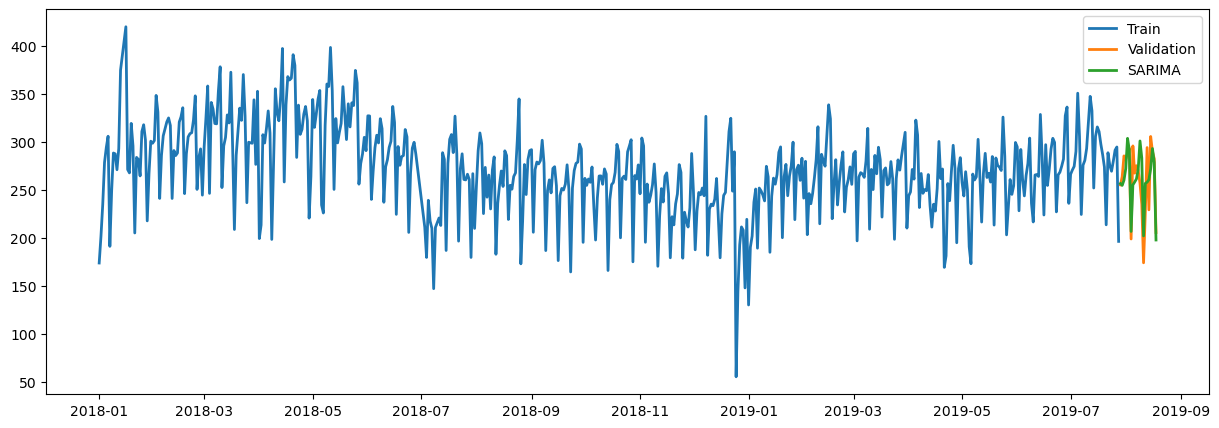

In [90]:
plt.figure(figsize = (15,5))
plt.plot(train.footfall, label = 'Train', linewidth = 2)
plt.plot(valid.footfall, label = 'Validation', linewidth = 2)
plt.plot(y_hat['SARIMA'], label = 'SARIMA', linewidth = 2)
plt.legend(loc = 'best')

In [91]:
pred_d = pd.DataFrame(y_hat['SARIMA'], index = valid.index)
pred_d = pred_d.reset_index(level = ['timestamp'])
pred_d['month'] = pred_d.timestamp.dt.month
pred_d['day'] = pred_d.timestamp.dt.day

temp4 = pd.merge(merge2, pred_d, on = ('month','day'), how = 'left')
temp4['prediction'] = temp2['ratio'] * temp4['SARIMA'] * 24

rmse_sarimax3 = rmse(temp4['footfall'], temp4['prediction'])
print('RMSE for SARIMA forecast is', rmse_sarimax3)

RMSE for SARIMA forecast is 53.278947161126084


In [52]:
def dm_test(actual_lst, pred1_lst, pred2_lst, h = 1, crit="MSE", power = 2):
    # Routine for checking errors
    def error_check():
        rt = 0
        msg = ""
        # Check if h is an integer
        if (not isinstance(h, int)):
            rt = -1
            msg = "The type of the number of steps ahead (h) is not an integer."
            return (rt,msg)
        # Check the range of h
        if (h < 1):
            rt = -1
            msg = "The number of steps ahead (h) is not large enough."
            return (rt,msg)
        len_act = len(actual_lst)
        len_p1  = len(pred1_lst)
        len_p2  = len(pred2_lst)
        # Check if lengths of actual values and predicted values are equal
        if (len_act != len_p1 or len_p1 != len_p2 or len_act != len_p2):
            rt = -1
            msg = "Lengths of actual_lst, pred1_lst and pred2_lst do not match."
            return (rt,msg)
        # Check range of h
        if (h >= len_act):
            rt = -1
            msg = "The number of steps ahead is too large."
            return (rt,msg)
        # Check if criterion supported
        if (crit != "MSE" and crit != "MAPE" and crit != "MAD" and crit != "poly"):
            rt = -1
            msg = "The criterion is not supported."
            return (rt,msg)  
        # Check if every value of the input lists are numerical values
        from re import compile as re_compile
        comp = re_compile("^\d+?\.\d+?$")  
        def compiled_regex(s):
            """ Returns True is string is a number. """
            if comp.match(s) is None:
                return s.isdigit()
            return True
        for actual, pred1, pred2 in zip(actual_lst, pred1_lst, pred2_lst):
            is_actual_ok = compiled_regex(str(abs(actual)))
            is_pred1_ok = compiled_regex(str(abs(pred1)))
            is_pred2_ok = compiled_regex(str(abs(pred2)))
            if (not (is_actual_ok and is_pred1_ok and is_pred2_ok)):  
                msg = "An element in the actual_lst, pred1_lst or pred2_lst is not numeric."
                rt = -1
                return (rt,msg)
        return (rt,msg)
    
    # Error check
    error_code = error_check()
    # Raise error if cannot pass error check
    if (error_code[0] == -1):
        raise SyntaxError(error_code[1])
        return
    # Import libraries
    from scipy.stats import t
    import collections
    import pandas as pd
    import numpy as np
    
    # Initialise lists
    e1_lst = []
    e2_lst = []
    d_lst  = []
    
    # convert every value of the lists into real values
    actual_lst = pd.Series(actual_lst).apply(lambda x: float(x)).tolist()
    pred1_lst = pd.Series(pred1_lst).apply(lambda x: float(x)).tolist()
    pred2_lst = pd.Series(pred2_lst).apply(lambda x: float(x)).tolist()
    
    # Length of lists (as real numbers)
    T = float(len(actual_lst))
    
    # construct d according to crit
    if (crit == "MSE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append((actual - p1)**2)
            e2_lst.append((actual - p2)**2)
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAD"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs(actual - p1))
            e2_lst.append(abs(actual - p2))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "MAPE"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(abs((actual - p1)/actual))
            e2_lst.append(abs((actual - p2)/actual))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)
    elif (crit == "poly"):
        for actual,p1,p2 in zip(actual_lst,pred1_lst,pred2_lst):
            e1_lst.append(((actual - p1))**(power))
            e2_lst.append(((actual - p2))**(power))
        for e1, e2 in zip(e1_lst, e2_lst):
            d_lst.append(e1 - e2)    
    
    # Mean of d        
    mean_d = pd.Series(d_lst).mean()
    
    # Find autocovariance and construct DM test statistics
    def autocovariance(Xi, N, k, Xs):
        autoCov = 0
        T = float(N)
        for i in np.arange(0, N-k):
              autoCov += ((Xi[i+k])-Xs)*(Xi[i]-Xs)
        return (1/(T))*autoCov
    gamma = []
    for lag in range(0,h):
        gamma.append(autocovariance(d_lst,len(d_lst),lag,mean_d)) # 0, 1, 2
    V_d = (gamma[0] + 2*sum(gamma[1:]))/T
    DM_stat=V_d**(-0.5)*mean_d
    harvey_adj=((T+1-2*h+h*(h-1)/T)/T)**(0.5)
    DM_stat = harvey_adj*DM_stat
    # Find p-value
    p_value = 2*t.cdf(-abs(DM_stat), df = T - 1)
    
    # Construct named tuple for return
    dm_return = collections.namedtuple('dm_return', 'DM p_value')
    
    rt = dm_return(DM = DM_stat, p_value = p_value)
    
    return rt

In [60]:
rt = dm_test(temp3['footfall'], temp3['prediction'], temp4['prediction'],h = 1, crit="MSE")
rt

dm_return(DM=-2.346700638270009, p_value=0.019327490039388853)